# **Distance Predictor Part 3**
Author: Declan Costello

Date: 8/6/2023

## **Part 3 Description**

Here I created features and then further explored these new trends

## **Table of Context**

1. [Installation](#Installation)
2. [Inspecting Data](#Inspecting-Data)
3. [Cleaning Data](#Cleaning-Data)
4. [Feature Engineering](#Feature-Engineering)
5. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Inspecting Data**

In [5]:
data = pd.read_csv('pybaseball_2022.csv')
data = data[data['hit_distance_sc'].notna()]

In [6]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed', "hc_x", "hc_y", "release_speed", "events", "home_team", "pitch_type", "stand", "p_throws", "woba_value"]]

In [7]:
print(data.shape)

data.isnull().sum().sort_values(ascending=False)

(116316, 12)


launch_speed       112
hc_x                38
hc_y                38
release_speed        7
launch_angle         2
hit_distance_sc      0
events               0
home_team            0
pitch_type           0
stand                0
p_throws             0
woba_value           0
dtype: int64

## **Cleaning Data**

In [8]:
data = data[data['hc_x'].notna()]
data = data[data['hc_y'].notna()]
data = data[data['launch_angle'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['release_speed'].notna()]

# **Feature Engineering**
The following is a list of the important features I created for future models:

*   **Platoon Splits** - In baseball, launch angle is the vertical angle at which the ball leaves the player's bat after being struck. It's measured in relation to the ground. A high launch angle means the ball will go further and higher into the air, and a low launch angle means the ball will go lower and not as far. 

*   **Pitch Type** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **Dome** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **Elevation** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **Spray** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **Pull %** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

*   **Barrel** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

**Platoon Splits**

 - 0 --> bad batting matchup
 - 1 --> good batting matchup

In [9]:
data['fav_platoon_split_for_batter'] = np.where(data['stand']!= data['p_throws'], 1, 0)


**Pitch Type**

 - 0 --> fastball
 - 1 --> breaking
 - 2 --> offspeed

In [10]:
pitch_type_grouped = {
    'FF':0,
    'SI':0,
    'SL':1,
    'CH':2,
    'FC':0,
    'CU':1,
    'ST':1,
    'KC':1, #knuckle curve a breaking ball, not offspeed right?
    'FS':2,
    'SV':1,
    'FA':0,
    'EP':2,
    'CS':1,#spiked curve?
    'KN':2 #knuckle ball is def off speed right?
}

data['grouped_pitch_type'] = data['pitch_type'].map(pitch_type_grouped)

**Dome**

- 0 --> no roof
- 1 --> roof

In [11]:
Domed_Stadiums = {
    'COL':0,
    'PHI':0,
    'AZ':1,
    'TOR':1,
    'STL':0,
    'NYY':0,
    'CLE':0,
    'KC':0,
    'PIT':0,
    'MIN':0,
    'DET':0,
    'WSH':0,
    'CWS':0,
    'NYM':0,
    'BOS':0,
    'BAL':0,
    'MIA':1,
    'OAK':0,
    'HOU':1,
    'SD':0,
    'LAD':0,
    'TEX':1,
    'SEA':1,
    'LAA':0,
    'CIN':0,
    'CHC':0,
    'TB':1,
    'SF':0,
    'ATL':0,
    'MIL':1
}

data['domed'] = data['home_team'].map(Domed_Stadiums)

**Elevation**

- stadium --> ft in elevation

In [12]:
Stadium_elevation = {
    'COL':5183,
    'PHI':9,
    'AZ':1082,
    'TOR':247,
    'STL':455,
    'NYY':54,
    'CLE':582,
    'KC':750,
    'PIT':743,
    'MIN':812,
    'DET':596,
    'WSH':25,
    'CWS':596,
    'NYM':54,
    'BOS':20,
    'BAL':130,
    'MIA':15,
    'OAK':42,
    'HOU':38,
    'SD':13,
    'LAD':267,
    'TEX':616,
    'SEA':10,
    'LAA':160,
    'CIN':683,
    'CHC':596,
    'TB':44,
    'SF':63,
    'ATL':1050,
    'MIL':593
}

data['game_elevation'] = data['home_team'].map(Stadium_elevation)

 **Spray**

In [13]:
data["spray_angle"] = np.arctan((data["hc_x"]-125.42)/(198.27-data["hc_y"]))*180/np.pi*.75

**Pull%**

Pulls go yard

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_41456/2217774118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRHitters['DIS_percentile'] = dataRHitters['hit_distance_sc'].rank(pct=True)


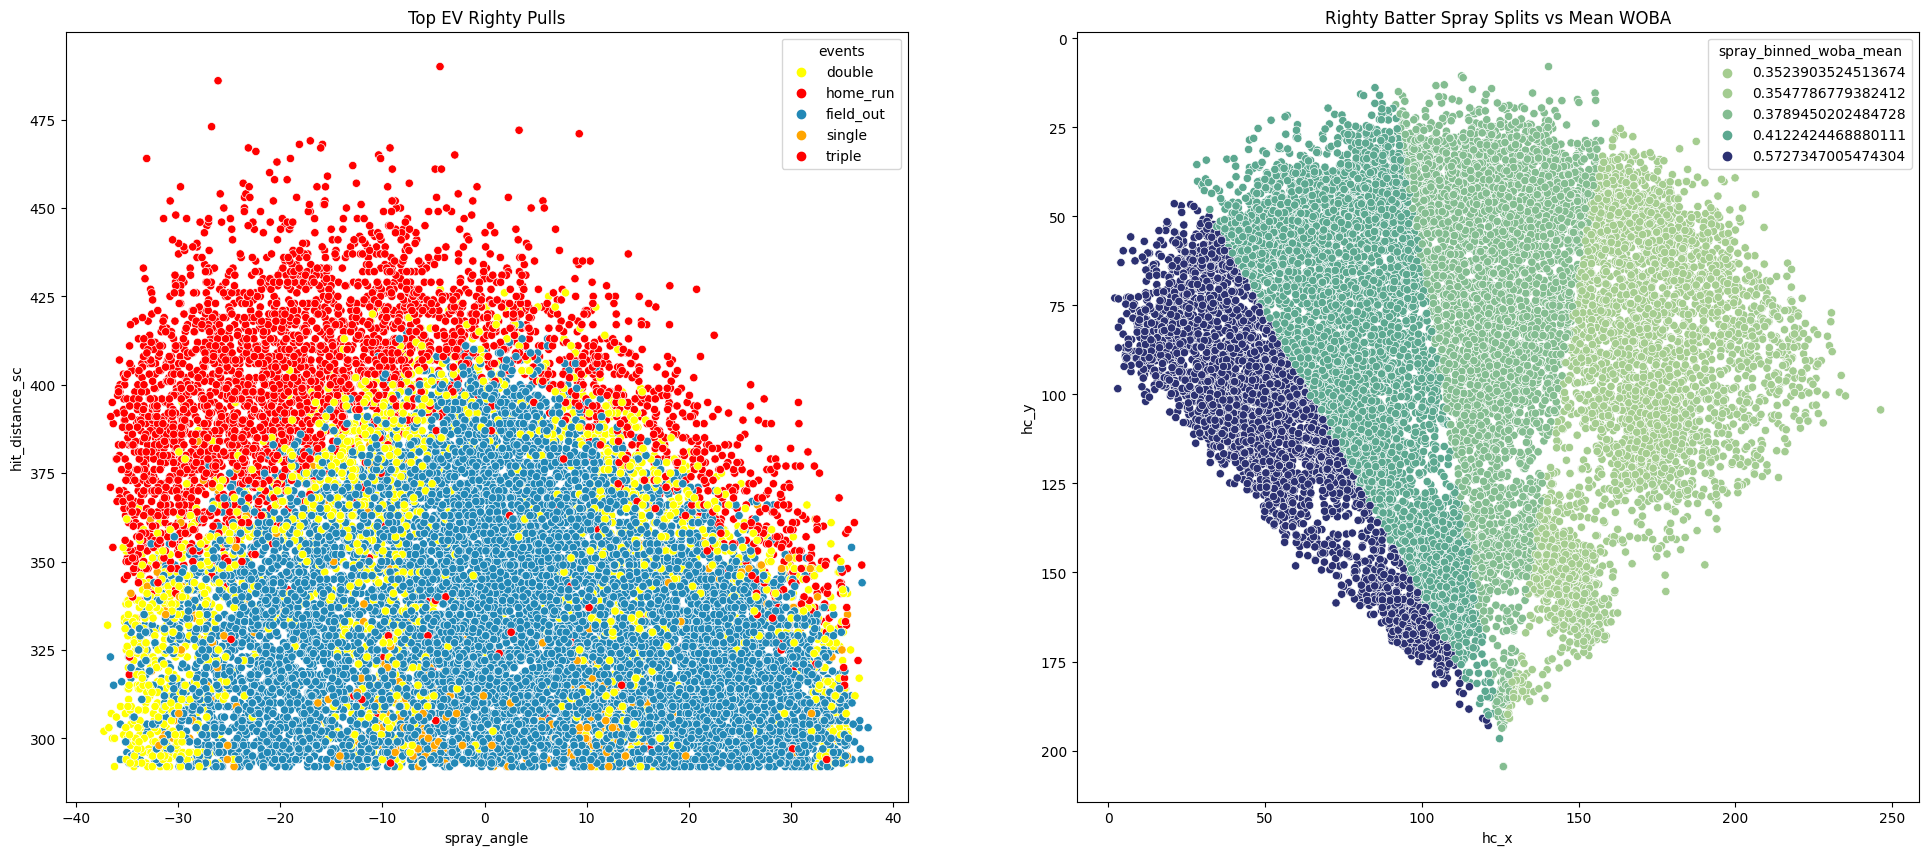

In [14]:
#----------- Top EV Righty Pulls ----------------------

dataRHitters = data[data['stand'].isin(["R"])]

dataRHitters['DIS_percentile'] = dataRHitters['hit_distance_sc'].rank(pct=True)

dataRHitters_top_75 = dataRHitters.loc[dataRHitters['DIS_percentile'] > 0.75]
dataRHitters_top_75 = dataRHitters_top_75.loc[dataRHitters['spray_angle'] < 38]
dataRHitters_top_75 = dataRHitters_top_75.loc[dataRHitters['spray_angle'] > -38]

#----------- Righty 5 sec spray chart ----------------------

data_rightys = data[data['stand'].isin(["R"])]

data_rightys = data_rightys.loc[data_rightys['spray_angle'] < 40]
data_rightys = data_rightys.loc[data_rightys['spray_angle'] > -40]

bins = np.linspace(data_rightys['spray_angle'].min(),data_rightys['spray_angle'].max(),6)

data_rightys['spray_angle_binned'] = pd.cut(data_rightys['spray_angle'], bins)

data_rightys['spray_angle_binned'] = data_rightys['spray_angle_binned'].astype(str)

pull_woba = data_rightys.groupby('spray_angle_binned')['woba_value'].mean()

righty_spray_binned_woba = pull_woba.to_dict()

data_rightys['spray_binned_woba_mean'] = data_rightys['spray_angle_binned'].map(righty_spray_binned_woba)

data_rightys['launch_speed_percentile'] = data_rightys['launch_speed'].rank(pct=True)
data_rightys_top_75 = data_rightys.loc[data_rightys['launch_speed_percentile'] > 0.75]

#------------------- Graph --------------------------

plt.figure(figsize=(50,10))

plt.subplot(142)
sns.scatterplot(data = dataRHitters_top_75, x=dataRHitters_top_75.spray_angle, y=dataRHitters_top_75.hit_distance_sc, hue = dataRHitters_top_75.events, palette=dict(home_run ='red',triple= 'red', field_out = '#2288b6', single = 'orange',double='yellow'))
plt.title('Top EV Righty Pulls')

plt.subplot(143)
ax = sns.scatterplot(data = data_rightys_top_75, x=data_rightys_top_75.hc_x, y=data_rightys_top_75.hc_y, hue = data_rightys_top_75.spray_binned_woba_mean, palette='crest')#palette='Paired')
ax.invert_yaxis()
plt.title('Righty Batter Spray Splits vs Mean WOBA')

plt.show()

In [15]:
data_rightys_top_75

hit_distance_sc  launch_angle  launch_speed    hc_x    hc_y  \
205                44.0          -1.0         103.2  103.05  151.06   
227               244.0          13.0         109.5   57.58  127.76   
237               272.0          14.0         100.2  103.56   75.50   
267               299.0          17.0         104.4  224.58  103.12   
427               378.0          32.0         106.9   34.10   75.88   
...                 ...           ...           ...     ...     ...   
740254            366.0          17.0         108.6   98.51   52.88   
740313            399.0          27.0         103.0  195.56   39.61   
740342            227.0          15.0         100.7   54.43  113.51   
740394            389.0          28.0         107.8   20.23   81.34   
740571            165.0          10.0         102.2   97.43  141.44   

        release_speed     events home_team pitch_type stand p_throws  \
205              79.5  field_out       HOU         KC     R        R   
227              82.0     double       HOU         CU     R        R   
237              94.8     single       HOU         FF     R        R   
267              95.6     double       HOU         SI     R        R   
427              94.1   home_run       NYY         SI     R        R   
...               ...        ...       ...        ...   ...      ...   
740254           93.9     double       MIA         SI     R        R   
740313           94.1   home_run       PIT         SI     R        R   
740342           77.2     double       PIT         CU     R        R   
740394           93.0   home_run       PIT         FF     R        L   
740571           84.1  field_out       PIT         ST     R        R   

        woba_value  fav_platoon_split_for_batter  grouped_pitch_type  domed  \
205           0.00                             0                   1      1   
227           1.25                             0                   1      1   
237           0.90                             0                   0      1   
267           1.25                             0                   0      1   
427           2.00                             0                   0      0   
...            ...                           ...                 ...    ...   
740254        1.25                             0                   0      1   
740313        2.00                             0                   0      0   
740342        1.25                             0                   1      0   
740394        2.00                             1                   0      0   
740571        0.00                             0                   1      0   

        game_elevation  spray_angle  spray_angle_binned  \
205                 38   -19.015109   (-23.986, -7.992]   
227                 38   -32.920795  (-39.981, -23.986]   
237                 38    -7.572059     (-7.992, 8.003]   
267                 38    34.636689    (23.998, 39.992]   
427                 54   -27.546052  (-39.981, -23.986]   
...                ...          ...                 ...   
740254              15    -7.864586     (-7.992, 8.003]   
740313             743    17.886854     (8.003, 23.998]   
740342             743   -29.960673  (-39.981, -23.986]   
740394             743   -31.480865  (-39.981, -23.986]   
740571             743   -19.665930   (-23.986, -7.992]   

        spray_binned_woba_mean  launch_speed_percentile  
205                   0.412242                 0.854606  
227                   0.572735                 0.979799  
237                   0.378945                 0.759520  
267                   0.354779                 0.888412  
427                   0.572735                 0.943566  
...                        ...                      ...  
740254                0.378945                 0.969989  
740313                0.352390                 0.848914  
740342                0.572735                 0.776191  
740394                0.572735                 0.959

# **Dynamic Hard Hit Rate**

# Leftys and Rightys Combined

In [16]:
#                                        if a lefty,                                                           lefty pull equation, righty pull equation
data['pull_percent'] = np.where(data['stand']== 'L', (data['spray_angle']+67.46509193730111)/(67.33640243518595+67.46509193730111), (abs(data['spray_angle']-67.48324031495474))/ (67.5 +67.48324031495474))

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_41456/2005200911.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_top_75['pull_percent_binned'] = pd.cut(ev_top_75['pull_percent'], bins)
/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_41456/2005200911.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  chart = sns.lineplot(data=pp_top_gb, x=pp_top_gb.pull_percent_binned.astype(str), y=pp_top_gb.hit_distance_sc, palette=dict(home_run ='red',triple= 'red', field_out = '#2288b6', single = 'orange',double='yellow'))


Text(0.5, 1.0, '<----- Push ----- Top 25th% EV Binned ----- Pull ----->')

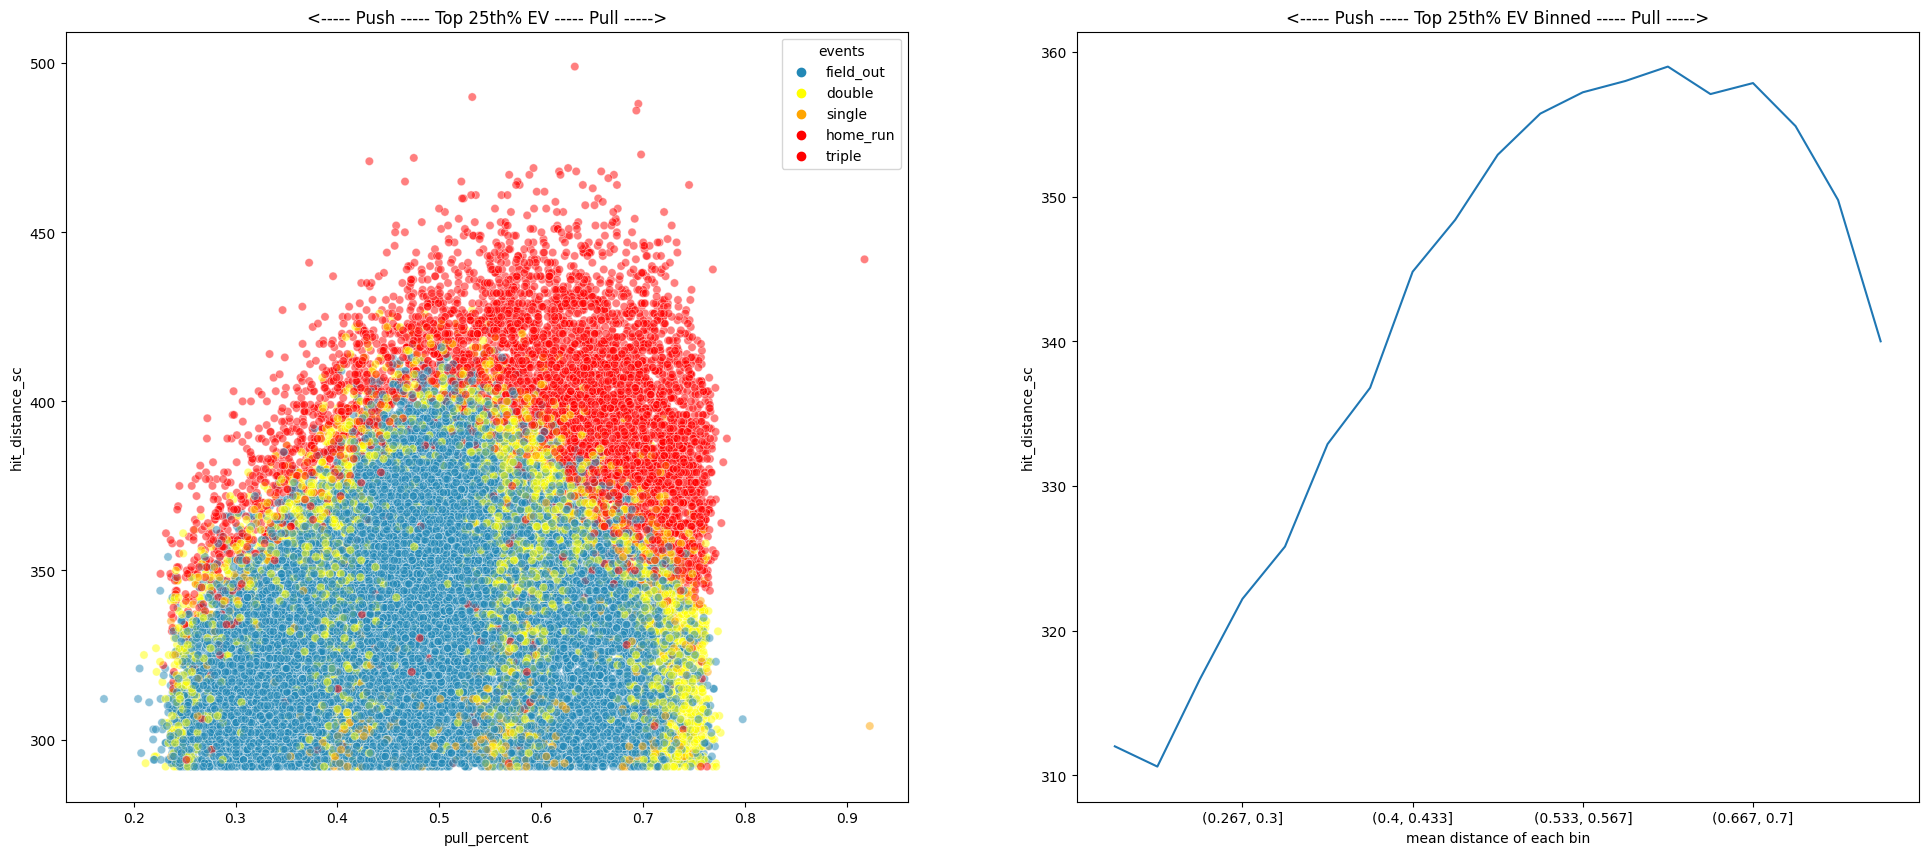

In [17]:
plt.figure(figsize=(50,10))

plt.subplot(142)
#scatter plot top ev
data['hit_distance_sc_per'] = data['hit_distance_sc'].rank(pct=True)
ev_top_75 = data.loc[data['hit_distance_sc_per'] > 0.75] #combine above simliar dataframe

sns.scatterplot(data = ev_top_75, x=ev_top_75.pull_percent, y=ev_top_75.hit_distance_sc, hue = data.events, alpha = 0.5, palette=dict(home_run ='red',triple= 'red', field_out = '#2288b6', single = 'orange',double='yellow'))
plt.title('<----- Push ----- Top 25th% EV ----- Pull ----->')

plt.subplot(143)
#bin top ev
bins = np.linspace(0,1,31)
ev_top_75['pull_percent_binned'] = pd.cut(ev_top_75['pull_percent'], bins)
pp_top_gb = ev_top_75.groupby('pull_percent_binned')['hit_distance_sc'].mean()

# create new df and reindex
pp_top_gb = pd.DataFrame(pp_top_gb)
pp_top_gb = pp_top_gb.reset_index()

#chop what I want
pp_top_gb = pp_top_gb.iloc[5:24,:]

chart = sns.lineplot(data=pp_top_gb, x=pp_top_gb.pull_percent_binned.astype(str), y=pp_top_gb.hit_distance_sc, palette=dict(home_run ='red',triple= 'red', field_out = '#2288b6', single = 'orange',double='yellow'))
chart.set(xticks=[3,7,11,15])
chart.set(xlabel='pull% binned')
chart.set(xlabel='mean distance of each bin')
plt.title('<----- Push ----- Top 25th% EV Binned ----- Pull ----->')


# **Mocking https://public.tableau.com/app/profile/chamb117/viz/MLBParkFactorsStatcast/BBE**

 **Barrel**

In [18]:
data["Barrel"] = data["launch_speed"]-data["release_speed"]

# **Easier to Pull Barrels**

In [19]:
data_R = data[data['stand'].isin(["R"])]

Barrels_from_above_75_release = data_R.loc[data_R['release_speed'] > 75]

Barrels_from_above_75_release['barrel_percentile'] = Barrels_from_above_75_release['Barrel'].rank(pct=True)

Best_Barrels_from_above_75_release = Barrels_from_above_75_release.loc[Barrels_from_above_75_release['barrel_percentile'] > 0.75]#launch_speed_percentile

bins = np.linspace(10,40,6)

Best_Barrels_from_above_75_release['Barrel_binned'] = pd.cut(Best_Barrels_from_above_75_release['Barrel'], bins)

Best_Barrels_from_above_75_release['Barrel_binned'] = Best_Barrels_from_above_75_release['Barrel_binned'].astype(str)

woba_Barrel_binned = Best_Barrels_from_above_75_release.groupby('Barrel_binned')['woba_value'].mean()

woba_Barrel_binned = woba_Barrel_binned.to_dict()

Best_Barrels_from_above_75_release['barrel_binned_woba_mean'] = Best_Barrels_from_above_75_release['Barrel_binned'].map(woba_Barrel_binned)

Best_Barrels_from_above_75_release

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_41456/2222006041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Barrels_from_above_75_release['barrel_percentile'] = Barrels_from_above_75_release['Barrel'].rank(pct=True)
/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_41456/2222006041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Best_Barrels_from_above_75_release['Barrel_binned'] = pd.cut(Best_Barrels_from_above_75_release['Barrel'], bins)
/var/folders/vc/prq7ffv51gl630xh6b

hit_distance_sc  launch_angle  launch_speed    hc_x    hc_y  \
188               383.0          28.0          98.2   90.82   61.22   
205                44.0          -1.0         103.2  103.05  151.06   
227               244.0          13.0         109.5   57.58  127.76   
275                 4.0         -31.0          89.9  101.84  156.51   
427               378.0          32.0         106.9   34.10   75.88   
...                 ...           ...           ...     ...     ...   
740254            366.0          17.0         108.6   98.51   52.88   
740342            227.0          15.0         100.7   54.43  113.51   
740394            389.0          28.0         107.8   20.23   81.34   
740571            165.0          10.0         102.2   97.43  141.44   
740597             60.0           2.0          93.5   98.65  168.02   

        release_speed     events home_team pitch_type stand  ...  \
188              81.0     double       HOU         CU     R  ...   
205              79.5  field_out       HOU         KC     R  ...   
227              82.0     double       HOU         CU     R  ...   
275              79.4  field_out       HOU         CU     R  ...   
427              94.1   home_run       NYY         SI     R  ...   
...               ...        ...       ...        ...   ...  ...   
740254           93.9     double       MIA         SI     R  ...   
740342           77.2     double       PIT         CU     R  ...   
740394           93.0   home_run       PIT         FF     R  ...   
740571           84.1  field_out       PIT         ST     R  ...   
740597           80.5     single       PIT         CU     R  ...   

       grouped_pitch_type  domed  game_elevation  spray_angle  pull_percent  \
188                     1      1              38   -10.626723      0.578664   
205                     1      1              38   -19.015109      0.640808   
227                     1      1              38   -32.920795      0.743826   
275                     1      1              38   -22.088602      0.663578   
427                     0      0              54   -27.546052      0.704008   
...                   ...    ...             ...          ...           ...   
740254                  0      1              15    -7.864586      0.558201   
740342                  1      0             743   -29.960673      0.721896   
740394                  0      0             743   -31.480865      0.733158   
740571                  1      0             743   -19.665930      0.645630   
740597                  1      0             743   -31.130626      0.730564   

        hit_distance_sc_per  Barrel  barrel_percentile  Barrel_binned  \
188                0.950331    17.2           0.909923   (16.0, 22.0]   
205                0.290355    23.7           0.979826   (22.0, 28.0]   
227                0.640102    27.5           0.994350   (22.0, 28.0]   
275                0.077463    10.5           0.755483   (10.0, 16.0]   
427                0.941988    12.8           0.818829   (10.0, 16.0]   
...                     ...     ...                ...            ...   
740254             0.920535    14.7           0.861246   (10.0, 16.0]   
740342             0.604117    23.5           0.978737   (22.0, 28.0]   
740394             0.959559    14.8           0.863860   (10.0, 16.0]   
740571             0.486239    18.1           0.924134   (16.0, 22.0]   
740597             0.321308    13.0           0.822634   (10.0, 16.0]   

        barrel_binned_woba_mean  
188                    0.814403  
205                    0.988736  
227                    0.988736  
275                    0.640350  
427                    0.640350  
...                         ...  
740254                 0.640350  
740342                 0.988736  
740394                 0.640350  
740571                 0.814403  
740597                 0.640350  

[17167 rows x 23 columns]

Text(0.5, 1.0, 'Righty Batters, easier to barrel when pulling')

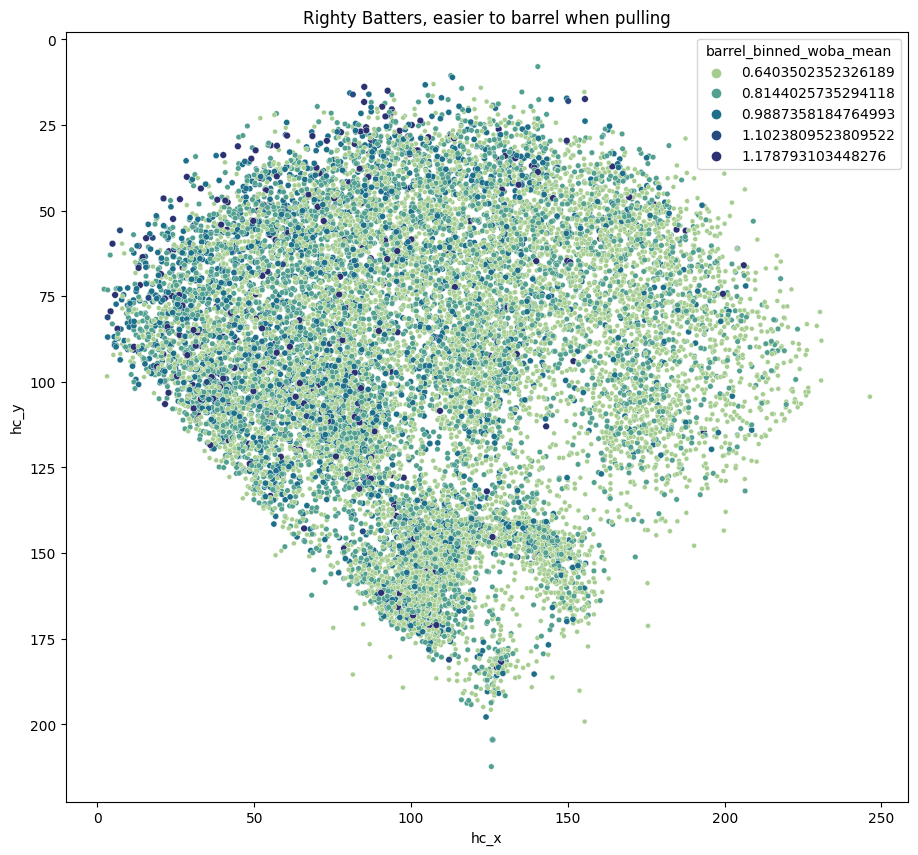

In [29]:
plt.figure(figsize=(50,10))

#increase size of dots if barrel

plt.subplot(143)
ax = sns.scatterplot(data = Best_Barrels_from_above_75_release, x=Best_Barrels_from_above_75_release.hc_x, y=Best_Barrels_from_above_75_release.hc_y, hue = Best_Barrels_from_above_75_release.barrel_binned_woba_mean, s=Best_Barrels_from_above_75_release.barrel_binned_woba_mean*20,palette='crest')# s=Best_Barrels_from_above_75_release.barrel_binned_woba_mean
ax.invert_yaxis()
plt.title('Righty Batters, easier to barrel when pulling')

# **[Makoing Barrels by field shape too](https://www.pitcherlist.com/going-deep-what-barrels-tell-us-about-the-nuance-of-park-factors/)**

**Harder to Barrel as Release Speed Increases**

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_22966/2361754701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Barrel_percentile_top_75['Barrel_percentile'] = Barrel_percentile_top_75['Barrel'].rank(pct=True)


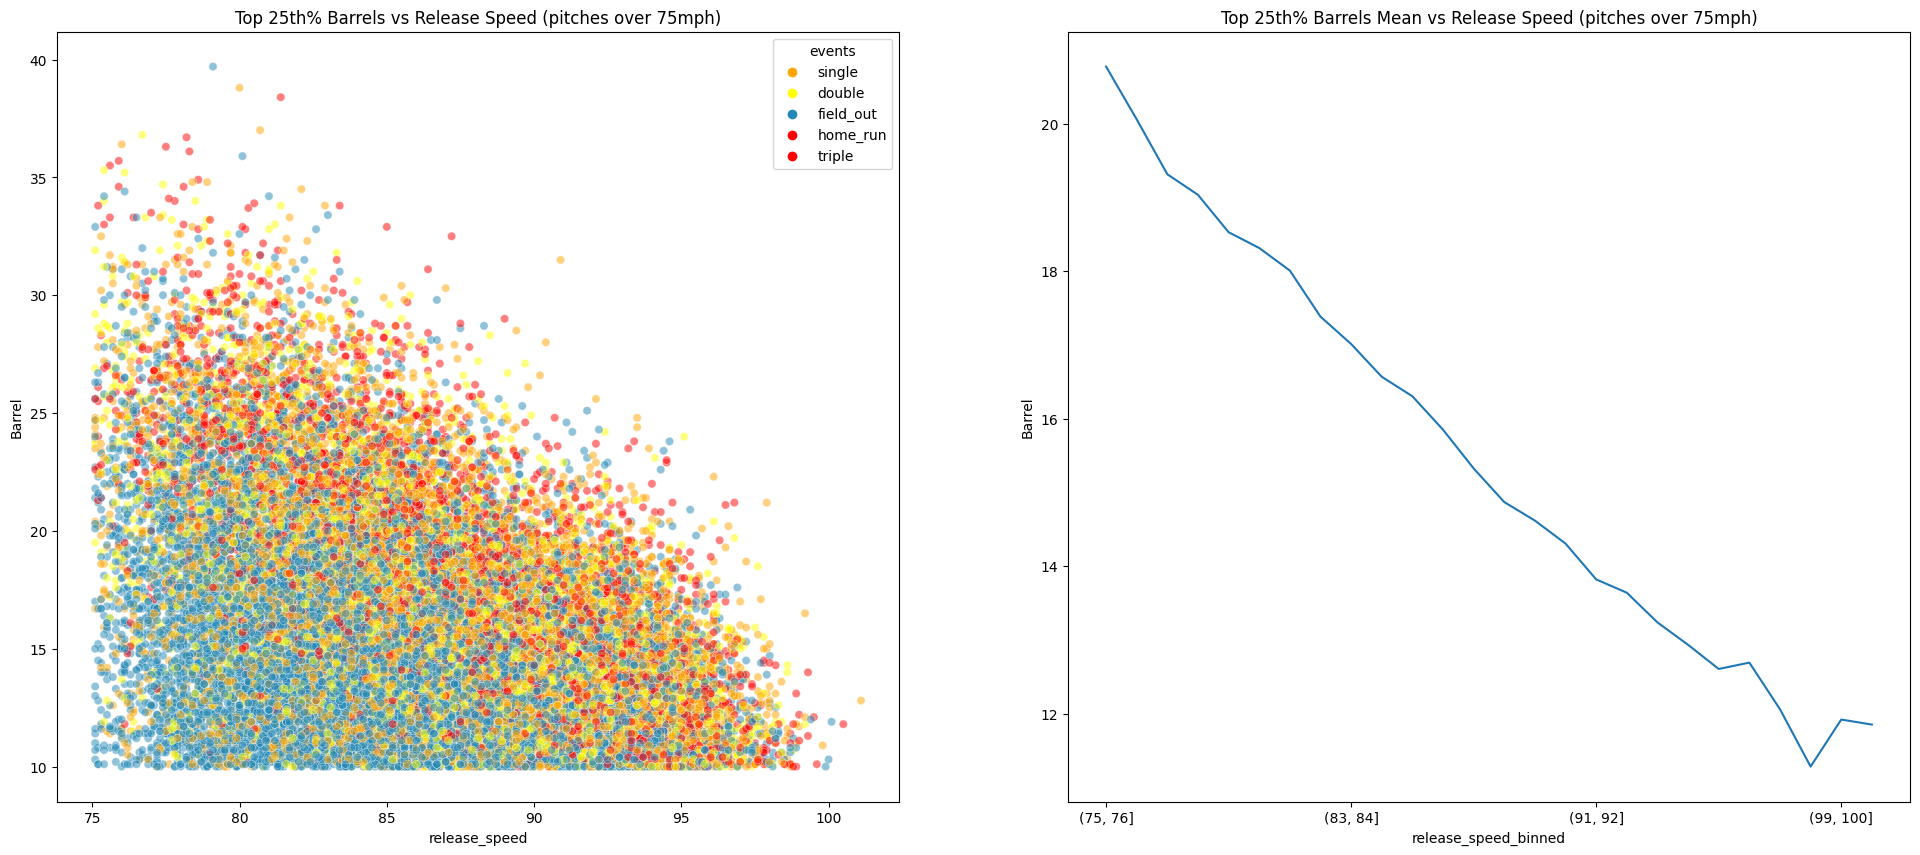

In [51]:
plt.figure(figsize=(50,10))

plt.subplot(142)
Barrel_percentile_top_75 = data.loc[data['release_speed'] > 75]
Barrel_percentile_top_75['Barrel_percentile'] = Barrel_percentile_top_75['Barrel'].rank(pct=True)
Barrel_percentile_top_75 = Barrel_percentile_top_75.loc[Barrel_percentile_top_75['Barrel_percentile'] > 0.75]

sns.scatterplot(data = Barrel_percentile_top_75, x=Barrel_percentile_top_75.release_speed, y=Barrel_percentile_top_75.Barrel,  hue = Barrel_percentile_top_75.events, alpha = 0.5, palette=dict(home_run ='red',triple= 'red', field_out = '#2288b6', single = 'orange',double='yellow'))
plt.title('Top 25th% Barrels vs Release Speed (pitches over 75mph)')

bins = []
for i in range(75, 102, 1):
    bins.append(i)

Barrel_percentile_top_75['release_speed_binned'] = pd.cut(Barrel_percentile_top_75['release_speed'], bins)

bp_top_gb = Barrel_percentile_top_75.groupby('release_speed_binned')['Barrel'].mean()
bp_top_gb_df = pd.DataFrame(bp_top_gb)
bp_top_gb_df = bp_top_gb_df.reset_index()

plt.subplot(143)
chart = sns.lineplot(data=bp_top_gb_df, x=bp_top_gb_df.release_speed_binned.astype(str), y=bp_top_gb_df.Barrel)
chart.set(xticks=[0,8,16,24])
plt.title('Top 25th% Barrels Mean vs Release Speed (pitches over 75mph)')

plt.show()

**LA vs Pull% vs Distance**

In [52]:
hitting_df = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

hitting_df = hitting_df[hitting_df['launch_speed'].notna()]
hitting_df = hitting_df[hitting_df['launch_angle'].notna()]
hitting_df = hitting_df[hitting_df['hc_x'].notna()]
hitting_df = hitting_df[hitting_df['hc_y'].notna()]
hitting_df = hitting_df[hitting_df['hit_distance_sc'].notna()]

hitting_df["spray_angle"] = np.arctan((hitting_df["hc_x"]-125.42)/(198.27-hitting_df["hc_y"]))*180/np.pi*.75

hitting_df['pull_percent'] = np.where(hitting_df['stand']== 'L', (hitting_df['spray_angle']+67.46509193730111)/(67.33640243518595+67.46509193730111), (abs(hitting_df['spray_angle']-67.48324031495474))/ (67.5 +67.48324031495474))

Text(0.5, 1.0, 'Optimal Puill% & LA for sum barrel - Complete Data')

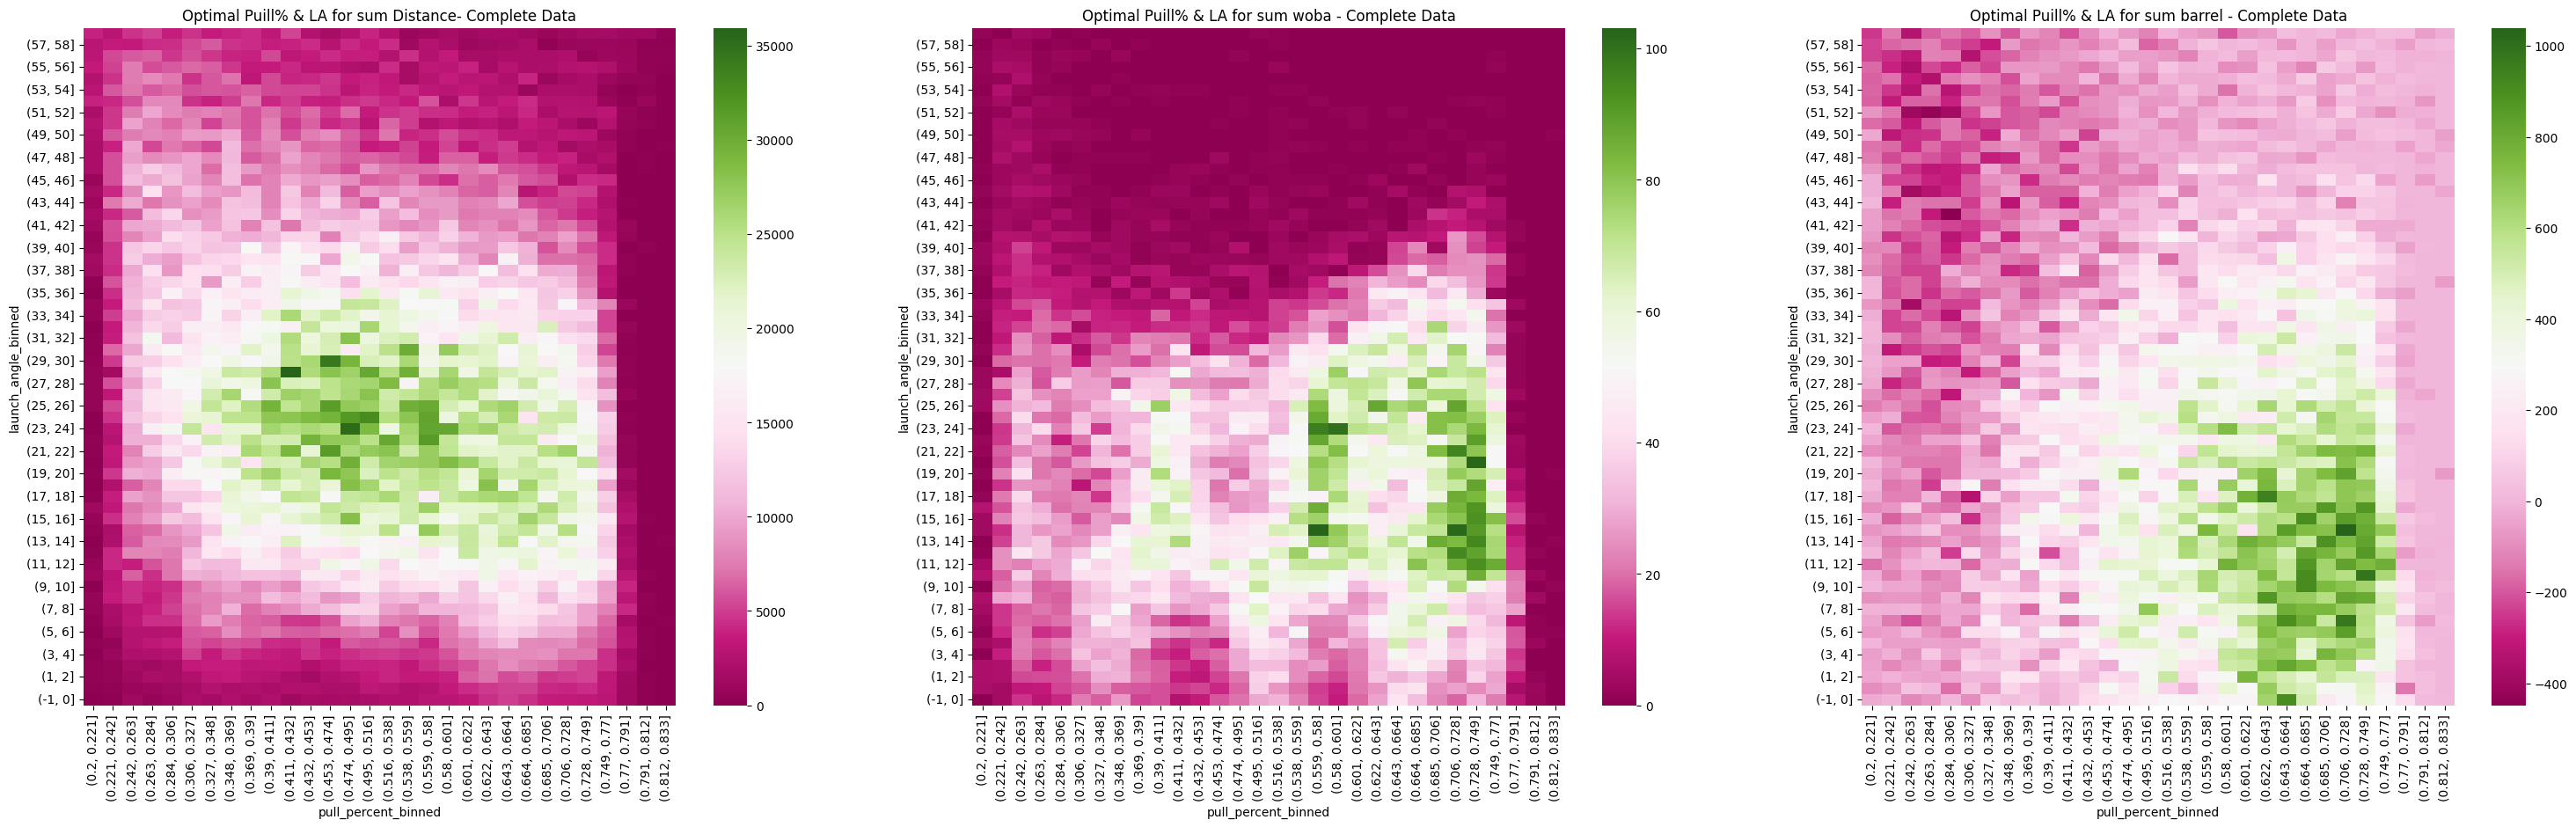

In [87]:
hitting_df_binned = hitting_df

#---------------LA--------------------

bins = []
for i in range(-1, 60, 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

#---------------Pull%-------------

bins = np.linspace(0.2,.833,31)

hitting_df_binned['pull_percent_binned'] = pd.cut(hitting_df['pull_percent'], bins)

non_coors_new_rel_terms_dis = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='hit_distance_sc', aggfunc='sum')

non_coors_new_rel_terms_woba = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='woba_value', aggfunc='sum')

non_coors_new_rel_terms_bar = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='Barrel', aggfunc='sum')

# ---------------Graph-------------

plt.figure(figsize=(50,10))

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms_dis,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum Distance- Complete Data')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_woba,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum woba - Complete Data')

plt.subplot(143)
ax = sns.heatmap(non_coors_new_rel_terms_bar,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum barrel - Complete Data')

Text(0.5, 1.0, 'Optimal Puill% & LA for sum barrel - Complete Data')

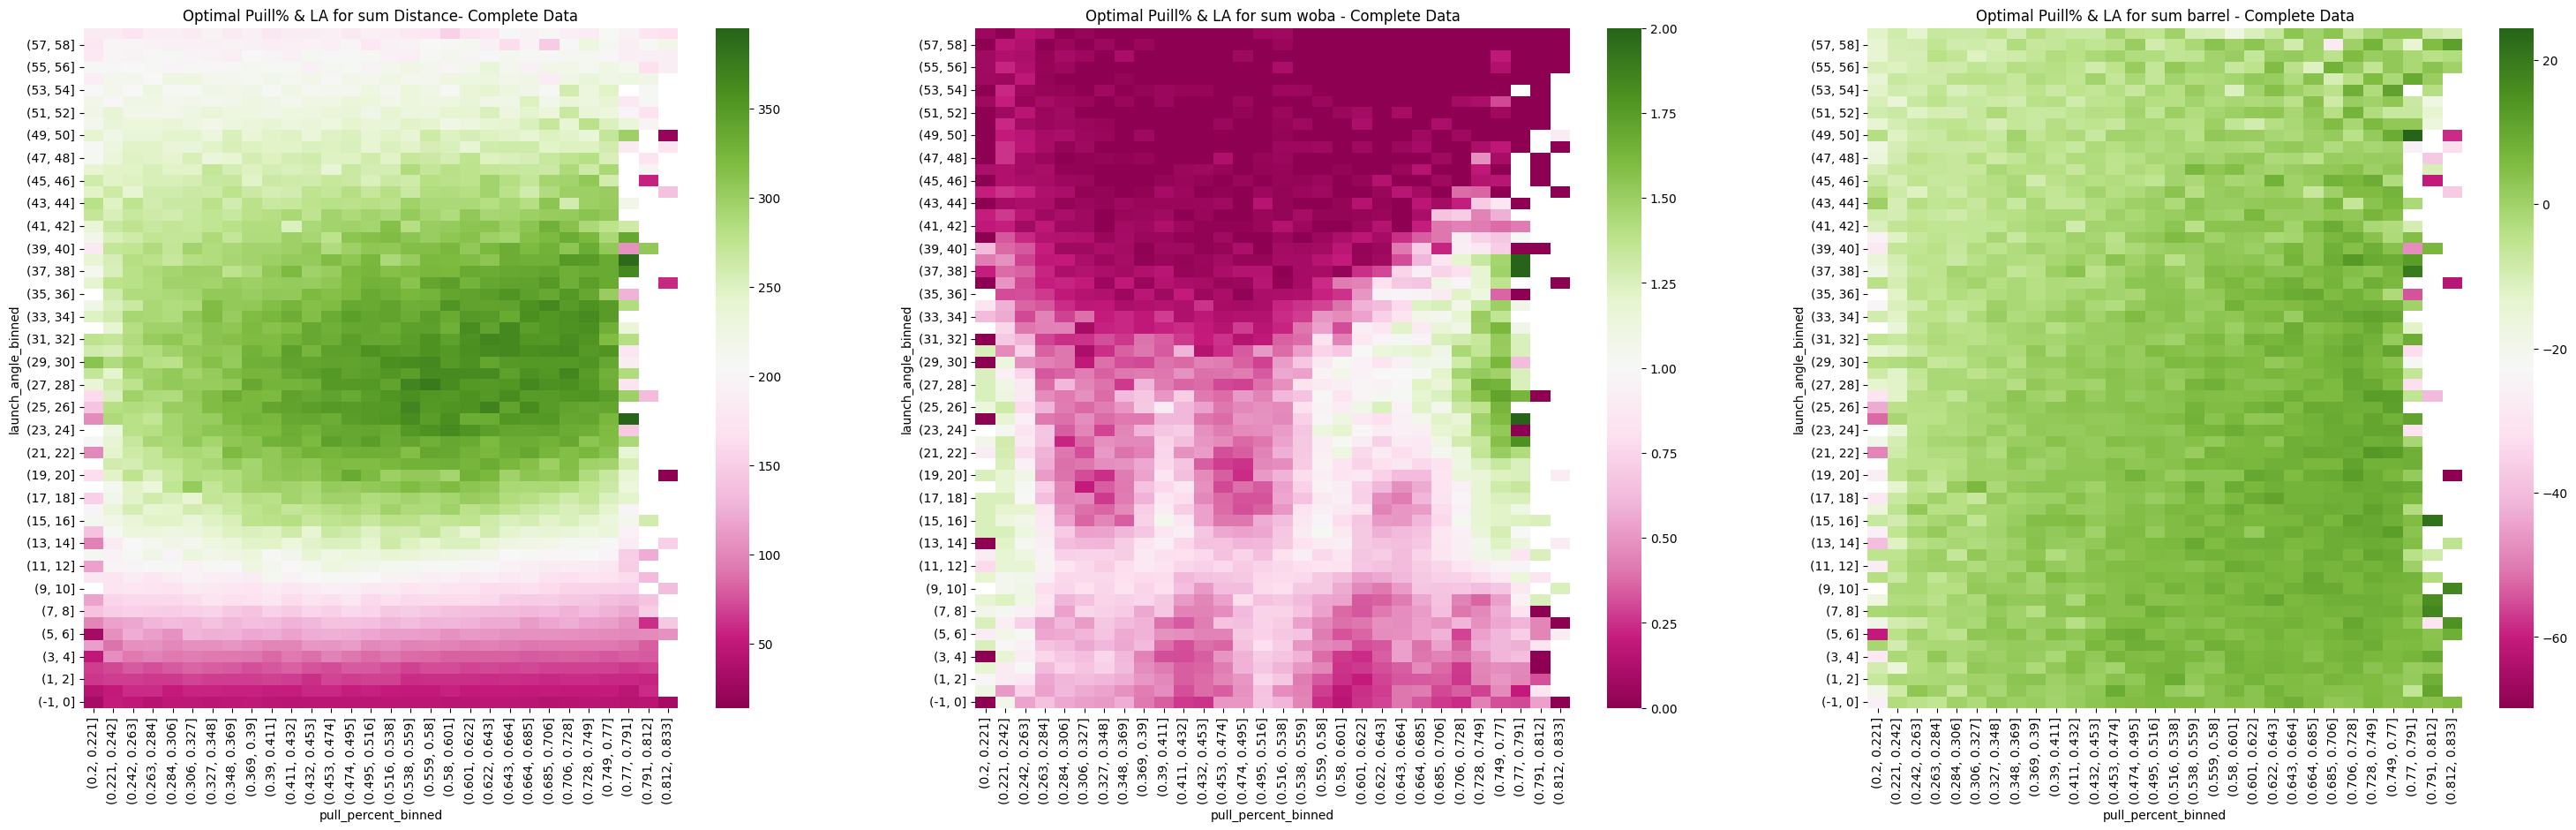

In [88]:
hitting_df_binned = hitting_df

#---------------LA--------------------

bins = []
for i in range(-1, 60, 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

#---------------Pull%-------------

bins = np.linspace(0.2,.833,31)

hitting_df_binned['pull_percent_binned'] = pd.cut(hitting_df['pull_percent'], bins)

non_coors_new_rel_terms_dis = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='hit_distance_sc', aggfunc='mean')

non_coors_new_rel_terms_woba = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='woba_value', aggfunc='mean')

non_coors_new_rel_terms_bar = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='pull_percent_binned', values='Barrel', aggfunc='mean')

# ---------------Graph-------------

plt.figure(figsize=(50,10))

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms_dis,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum Distance- Complete Data')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_woba,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum woba - Complete Data')

plt.subplot(143)
ax = sns.heatmap(non_coors_new_rel_terms_bar,cmap="PiYG")
ax.invert_yaxis()
plt.title('Optimal Puill% & LA for sum barrel - Complete Data')

# **Future Analysis**

Use these new features to create a better ML Model